In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline
# Print directory output
os.listdir()
import matplotlib as mpl
from PIL import Image
from io import BytesIO
mpl.rc('figure', dpi=400)
mpl.rcParams['figure.figsize'] = (20,10)

%matplotlib inline


['sinusoidal.csv',
 'square.csv',
 'simulated_data_plotting.ipynb',
 'smooth_combined_output.png',
 '.ipynb_checkpoints',
 'sim_ABP_output.csv',
 'simulated_combined_impaired_ABP.csv',
 'combined.csv',
 'simulate_data.py',
 'simulated_smooth_combined_impaired_ABP.csv',
 'simulated_ABP.csv',
 'smooth_combined.csv',
 'step.csv',
 'simulated_step_ABP.csv',
 'simulated_square_ABP.csv',
 'simulated_combined_ABP.csv',
 'combined_output.png',
 'simulated_smooth_combined_ABP.csv']

### Import data
We begin by importing the data that has been simulated. 

The chosen data sets will be the input data generated from all wave types and then the corresponding healthy and impaired model simulations.

In [154]:
healthy = pd.read_csv('simulated_combined_ABP.csv')
impaired = pd.read_csv('simulated_combined_impaired_ABP.csv')

In [155]:
# Set signals to plot
signals = ['P_a', 'CBF', 'Vmca', 'TOI', 'CCO']

axes_dict = {"P_a": r"$P_{a}$ (mmHg)",
             'Vmca' : r"$V_{mca}$ (cm $s^{-1}$)",
            'CBF': r'CBF ($ml_{blood}ml^{-1}_{brain}s^{-1}$)',
            "TOI": r"TOI",
            "CCO": r'oxCCO ($\mu M$)'}

# Melt healthy dataframe down for plotting
healthy_melt = pd.melt(healthy, id_vars='t', value_vars=signals)
healthy_melt.columns=['Time (seconds)','Output','']
healthy_melt = healthy_melt.reindex(columns = healthy_melt.columns.tolist() + ['k_aut'])
healthy_melt['k_aut'] = pd.Series([1.0]*healthy_melt.shape[0], index=healthy_melt.index)

# Melt impaired dataframe down to plot
impaired_melt = pd.melt(impaired, id_vars='t', value_vars=signals)
impaired_melt.columns=['Time (seconds)','Output','']
impaired_melt = impaired_melt.reindex(columns = impaired_melt.columns.tolist() + ['k_aut'])
impaired_melt['k_aut'] = pd.Series([0.7]*impaired_melt.shape[0], index=impaired_melt.index)

In [156]:
plot_df = pd.concat([healthy_melt, impaired_melt])

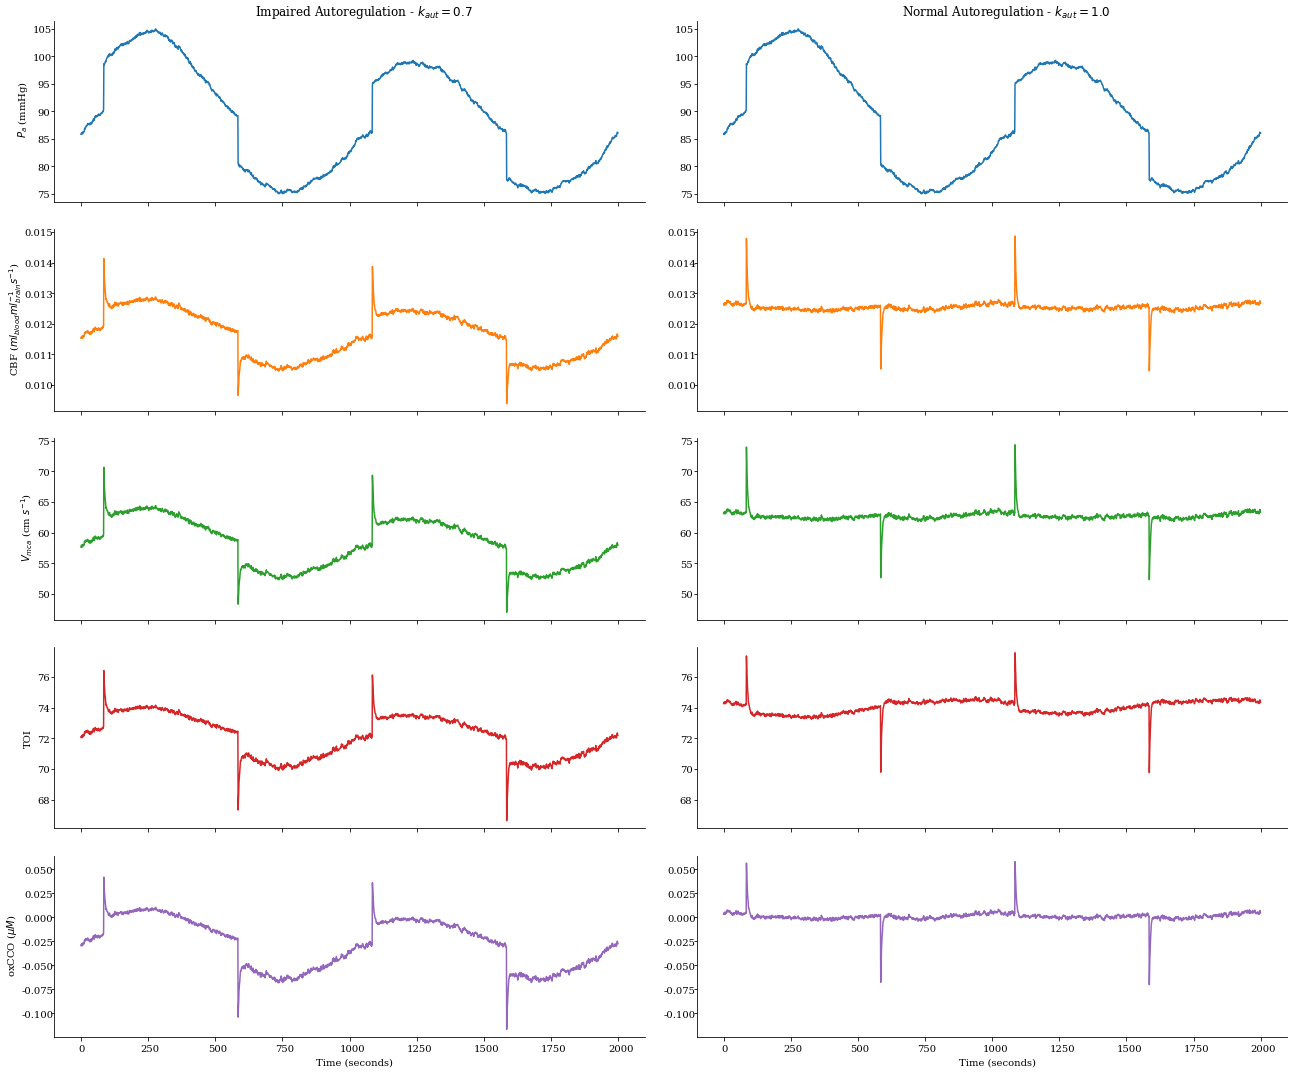

In [157]:
plt.rc('text', usetex=False)
g = sns.FacetGrid(plot_df, row='Output', col='k_aut', hue='Output', sharex=True, sharey=False, size=3, aspect=3)

g=(g.map(plt.plot, "Time (seconds)", "", linestyle='solid', marker=None).set_titles(""))


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for idx, s in enumerate(signals):
    g.axes[idx,0].set_ylabel(axes_dict[s])

    

g.axes[0,0].set_title(r"Impaired Autoregulation - $k_{aut}=0.7$")
g.axes[0,1].set_title(r"Normal Autoregulation - $k_{aut}=1.0$")

for axlist in g.axes:
    lims_1 = axlist[0].get_ylim()
    lims_2 = axlist[1].get_ylim()
    new_lims = (min(min(lims_1, lims_2)), max(max(lims_1, lims_2)))
    axlist[0].set_ylim(new_lims)
    axlist[1].set_ylim(new_lims)

g.savefig('combined_output.png')

## Smooth input data

Same as bove, but without the square wave, producing a smoother signal (more realistic).

In [159]:
healthy = pd.read_csv('simulated_smooth_combined_ABP.csv')
impaired = pd.read_csv('simulated_smooth_combined_impaired_ABP.csv')

In [160]:

# Melt healthy dataframe down for plotting
healthy_melt = pd.melt(healthy, id_vars='t', value_vars=signals)
healthy_melt.columns=['Time (seconds)','Output','']
healthy_melt['k_aut'] = [1.0]*healthy_melt.shape[0]

# Melt impaired dataframe down to plot
impaired_melt = pd.melt(impaired, id_vars='t', value_vars=signals)
impaired_melt.columns=['Time (seconds)','Output','']
impaired_melt['k_aut'] = [0.7]*impaired_melt.shape[0]

In [161]:
plot_df = pd.concat([healthy_melt, impaired_melt])

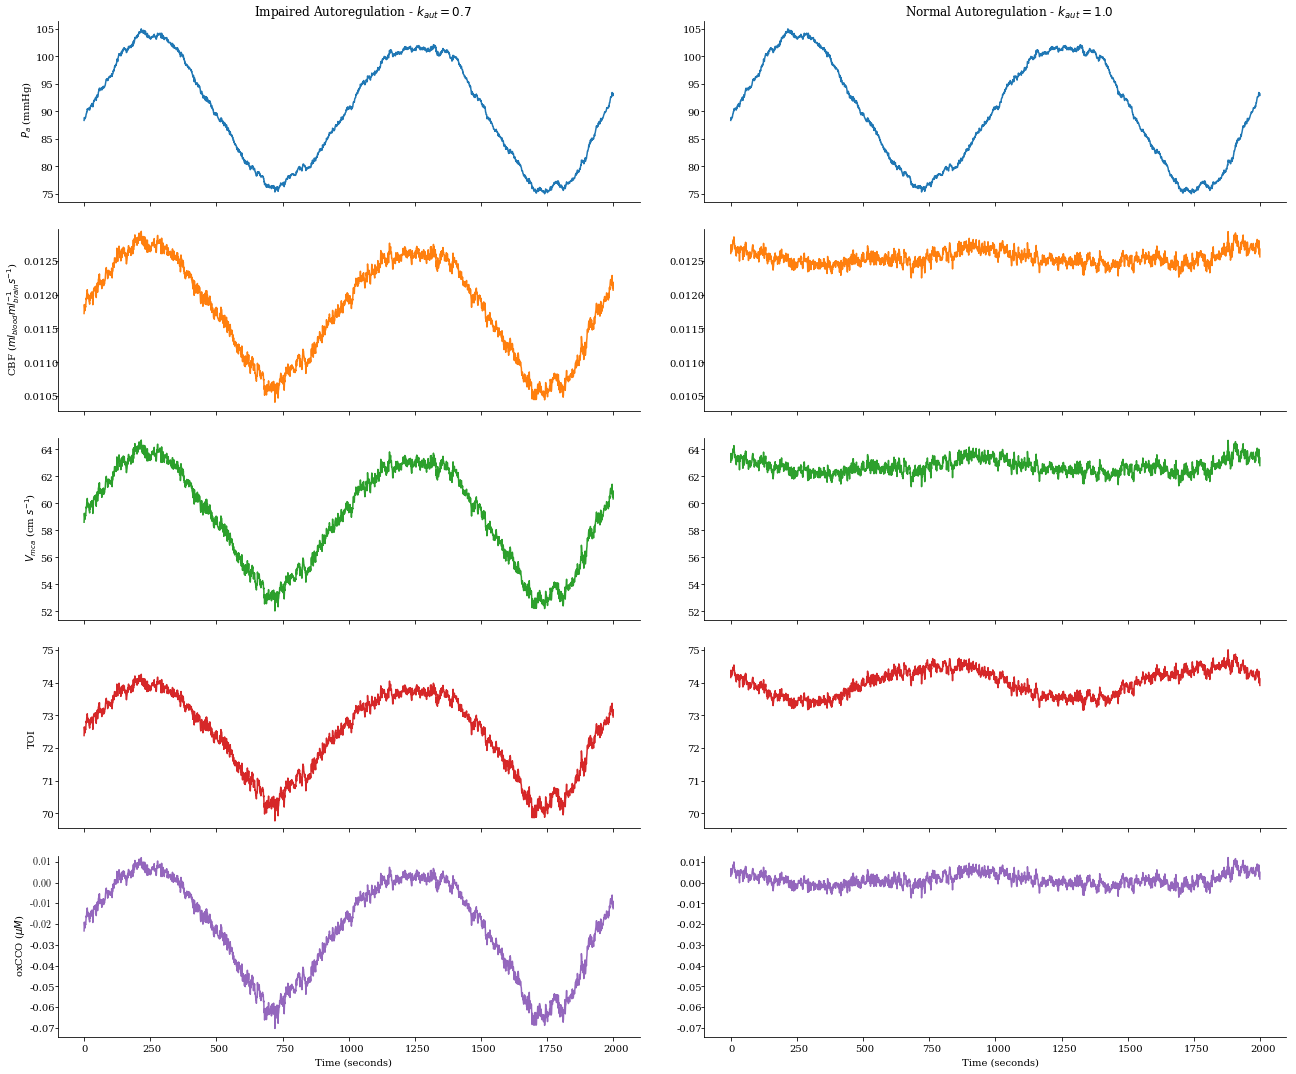

In [162]:
plt.rc('text', usetex=False)
g = sns.FacetGrid(plot_df, row='Output', col='k_aut', hue='Output', sharex=True, sharey=False, size=3, aspect=3)

g=(g.map(plt.plot, "Time (seconds)", "", linestyle='solid', marker=None).set_titles(""))


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for idx, s in enumerate(signals):
    g.axes[idx,0].set_ylabel(axes_dict[s])

    

g.axes[0,0].set_title(r"Impaired Autoregulation - $k_{aut}=0.7$")
g.axes[0,1].set_title(r"Normal Autoregulation - $k_{aut}=1.0$")

for axlist in g.axes:
    lims_1 = axlist[0].get_ylim()
    lims_2 = axlist[1].get_ylim()
    new_lims = (min(min(lims_1, lims_2)), max(max(lims_1, lims_2)))
    axlist[0].set_ylim(new_lims)
    axlist[1].set_ylim(new_lims)

g.savefig('smooth_combined_output.png')